# Proyecto # 2
Cristina Bautista - 161260

Abril Palencia - 18198 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

%matplotlib inline

In [2]:
df_train = pd.read_csv('sample_train2.csv')

In [3]:
df_train.head()

,Unnamed: 0,EngineVersion,AppVersion,CountryIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,...,SkuEdition,IsProtected,SMode,Firewall,UacLuaenable,Census_DeviceFamily,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,HasDetections
0,0,0,3,97,124,2,1,2,7601,768,...,2,1.0,0.0,0.0,1.0,0,142.0,33054.0,0,0
1,1,1,0,149,56,0,0,0,17134,768,...,0,1.0,0.0,1.0,1.0,0,628.0,11778.0,0,1
2,2,1,0,51,103,0,0,0,17134,768,...,0,1.0,0.0,1.0,1.0,0,628.0,33105.0,0,1
3,3,1,0,41,217,0,0,0,17134,256,...,1,1.0,0.0,1.0,1.0,0,554.0,33111.0,0,1
4,4,1,0,122,88,0,0,0,16299,256,...,1,1.0,0.0,1.0,1.0,0,628.0,33111.0,0,1


In [4]:
df_train = df_train.drop(labels=["Unnamed: 0"], axis=1)

In [5]:
df_train.head()

,EngineVersion,AppVersion,CountryIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,SMode,Firewall,UacLuaenable,Census_DeviceFamily,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,HasDetections
0,0,3,97,124,2,1,2,7601,768,7,2,1.0,0.0,0.0,1.0,0,142.0,33054.0,0,0
1,1,0,149,56,0,0,0,17134,768,0,0,1.0,0.0,1.0,1.0,0,628.0,11778.0,0,1
2,1,0,51,103,0,0,0,17134,768,0,0,1.0,0.0,1.0,1.0,0,628.0,33105.0,0,1
3,1,0,41,217,0,0,0,17134,256,0,1,1.0,0.0,1.0,1.0,0,554.0,33111.0,0,1
4,1,0,122,88,0,0,0,16299,256,1,1,1.0,0.0,1.0,1.0,0,628.0,33111.0,0,1


In [6]:
df_test = pd.read_csv('sample_test2.csv')

In [7]:
df_test.head()

,Unnamed: 0,EngineVersion,AppVersion,CountryIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,SMode,Firewall,UacLuaenable,Census_DeviceFamily,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled
0,0,0,3,207,75,0,0,0,17134,256,0,1,1.0,1.0,1.0,1.0,0,355.0,33108.0,0
1,1,0,0,207,75,0,0,0,10586,768,4,0,1.0,0.0,1.0,1.0,0,355.0,11778.0,1
2,2,0,3,207,75,0,0,0,17134,256,0,1,1.0,1.0,1.0,1.0,0,142.0,33111.0,0
3,3,0,3,85,225,0,0,0,17134,256,0,1,1.0,1.0,1.0,1.0,0,355.0,11778.0,1
4,4,1,3,158,75,0,0,0,17134,256,0,1,1.0,1.0,1.0,1.0,0,556.0,33108.0,0


In [8]:
df_test = df_test.drop(labels=["Unnamed: 0"], axis=1)

In [9]:
df_test.head()

,EngineVersion,AppVersion,CountryIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,SMode,Firewall,UacLuaenable,Census_DeviceFamily,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled
0,0,3,207,75,0,0,0,17134,256,0,1,1.0,1.0,1.0,1.0,0,355.0,33108.0,0
1,0,0,207,75,0,0,0,10586,768,4,0,1.0,0.0,1.0,1.0,0,355.0,11778.0,1
2,0,3,207,75,0,0,0,17134,256,0,1,1.0,1.0,1.0,1.0,0,142.0,33111.0,0
3,0,3,85,225,0,0,0,17134,256,0,1,1.0,1.0,1.0,1.0,0,355.0,11778.0,1
4,1,3,158,75,0,0,0,17134,256,0,1,1.0,1.0,1.0,1.0,0,556.0,33108.0,0


In [10]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

In [11]:
sorted(Counter(df_train['HasDetections']).items())

[(0, 499307), (1, 500693)]

In [12]:
df_train.HasDetections.value_counts(normalize=True)

1    0.500693
0    0.499307
Name: HasDetections, dtype: float64

1    500693
0    499307
Name: HasDetections, dtype: int64

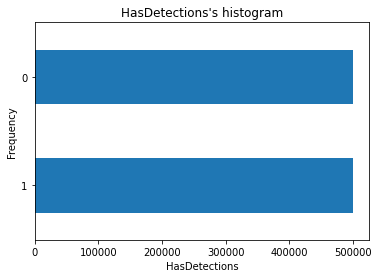

In [13]:
pd.value_counts(df_train['HasDetections']).plot.barh()
plt.title("HasDetections's histogram")
plt.xlabel('HasDetections')
plt.ylabel('Frequency')
df_train['HasDetections'].value_counts()

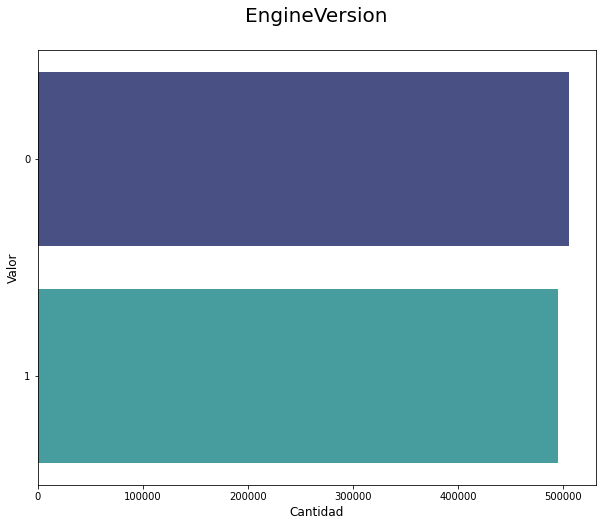

In [14]:
EngineVersion = df_train['EngineVersion'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=EngineVersion.tolist(), y=EngineVersion.index, orient='h', palette='mako')
plt.title('EngineVersion\n', fontsize=20)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.show()

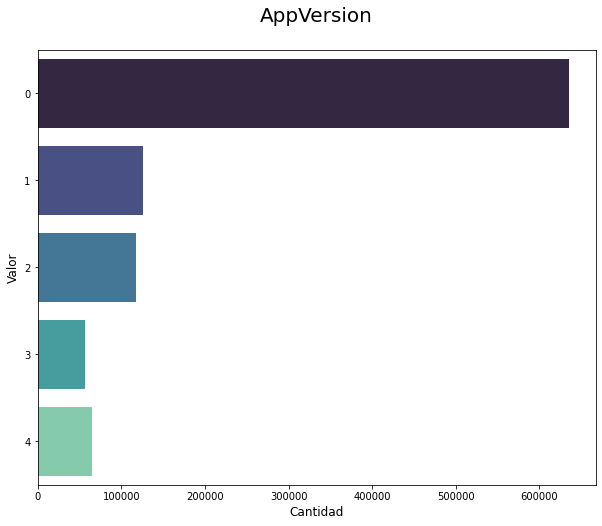

In [15]:
AppVersion = df_train['AppVersion'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=AppVersion.tolist(), y=AppVersion.index, orient='h', palette='mako')
plt.title('AppVersion\n', fontsize=20)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.show()

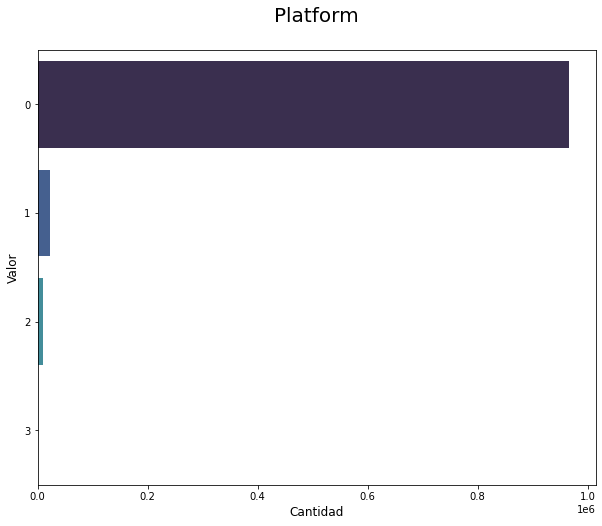

In [16]:
Platform = df_train['Platform'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=Platform.tolist(), y=Platform.index, orient='h', palette='mako')
plt.title('Platform\n', fontsize=20)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.show()

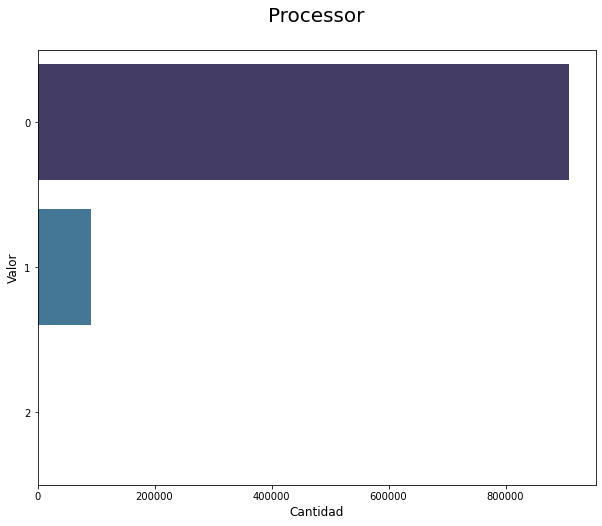

In [17]:
Processor = df_train['Processor'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=Processor.tolist(), y=Processor.index, orient='h', palette='mako')
plt.title('Processor\n', fontsize=20)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.show()

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   EngineVersion                          1000000 non-null  int64  
 1   AppVersion                             1000000 non-null  int64  
 2   CountryIdentifier                      1000000 non-null  int64  
 3   LocaleEnglishNameIdentifier            1000000 non-null  int64  
 4   Platform                               1000000 non-null  int64  
 5   Processor                              1000000 non-null  int64  
 6   OsVer                                  1000000 non-null  int64  
 7   OsBuild                                1000000 non-null  int64  
 8   OsSuite                                1000000 non-null  int64  
 9   OsPlatformSubRelease                   1000000 non-null  int64  
 10  SkuEdition                             1000

In [19]:
X_train = df_train
Y_train = df_train[['HasDetections']]
X_train = X_train.drop(['HasDetections'], axis=1)

In [20]:
Y_train.value_counts()

HasDetections
1                500693
0                499307
dtype: int64

In [21]:
X_train.shape, Y_train.shape

((1000000, 19), (1000000, 1))

In [22]:
ros = RandomOverSampler(random_state=5)
X_resample_train, Y_resample_train = ros.fit_resample(X_train, Y_train)

In [23]:
X_resample_train = X_resample_train.sample(n = 1000000)
X_resample_train

,EngineVersion,AppVersion,CountryIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,SMode,Firewall,UacLuaenable,Census_DeviceFamily,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled
736051,0,3,141,227,1,0,1,9600,768,6,0,1.0,0.0,1.0,1.0,0,554.0,33054.0,1
487716,1,0,93,74,0,0,0,17134,768,0,0,1.0,0.0,1.0,1.0,0,142.0,33105.0,0
933911,0,0,166,230,0,0,0,15063,768,2,0,1.0,0.0,1.0,1.0,0,554.0,33105.0,1
429921,1,0,169,179,0,0,0,15063,768,2,0,1.0,0.0,1.0,1.0,0,142.0,33111.0,0
350513,0,0,6,75,0,1,0,16299,768,1,0,1.0,0.0,1.0,1.0,0,142.0,33108.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626503,1,0,150,162,0,0,0,17134,768,0,0,1.0,0.0,1.0,1.0,0,142.0,33105.0,1
439053,1,0,93,75,0,0,0,16299,256,1,1,1.0,0.0,1.0,1.0,0,628.0,33108.0,0
333126,0,0,151,75,0,0,0,17134,256,0,1,1.0,0.0,1.0,1.0,0,142.0,33108.0,0
618449,0,0,195,42,0,0,0,10586,768,4,0,1.0,0.0,1.0,1.0,0,142.0,33054.0,1


In [24]:
Y_resample_train = Y_resample_train.groupby("HasDetections").sample(n=500000, random_state=1)
Y_resample_train.value_counts()

HasDetections
0                500000
1                500000
dtype: int64

In [25]:
X_test = df_test

In [26]:
X_resample_train.shape, Y_resample_train.shape, X_test.shape

((1000000, 19), (1000000, 1), (1000000, 19))

In [27]:
X_resample_trainLR = X_resample_train
Y_resample_trainLR = Y_resample_train
X_testLR = X_test

In [28]:
target_names=[0, 1]
target_names=list(map(str,target_names))

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean, std

In [31]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [32]:
lr.fit(X_resample_trainLR, Y_resample_trainLR)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [33]:
target_predictionLR = lr.predict(X_testLR)
y_prob_predLR = lr.predict_proba(X_testLR)

In [34]:
accuracy_score(Y_resample_trainLR, target_predictionLR)

0.500311

In [35]:
confusion_matrix(Y_resample_trainLR, target_predictionLR)

array([[255727, 244273],
       [255416, 244584]])

In [36]:
print(classification_report(Y_resample_trainLR, target_predictionLR, target_names=target_names))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51    500000
           1       0.50      0.49      0.49    500000

    accuracy                           0.50   1000000
   macro avg       0.50      0.50      0.50   1000000
weighted avg       0.50      0.50      0.50   1000000



In [37]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)

In [38]:
n_scoresLR = cross_val_score(lr, Y_resample_trainLR, target_predictionLR, scoring='accuracy', 
                           cv=cv, n_jobs=-1)

In [39]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scoresLR), std(n_scoresLR)))

Mean Accuracy: 0.511 (0.000)


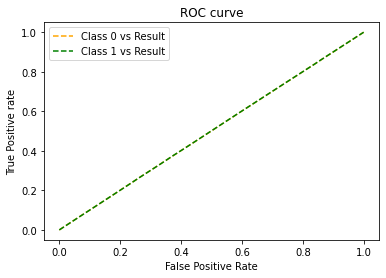

In [40]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_resample_trainLR, y_prob_predLR[:, i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Result')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Result')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [41]:
X_resample_trainRF = X_resample_train
Y_resample_trainRF = Y_resample_train
X_testRF = X_test

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dTree = DecisionTreeClassifier()
dTree.fit(X_resample_trainRF, Y_resample_trainRF)

DecisionTreeClassifier()

In [44]:
target_predictionRF = dTree.predict(X_testRF)
y_prob_predRF = dTree.predict_proba(X_testRF)

In [45]:
accuracy_score(Y_resample_trainRF, target_predictionRF)

0.497767

In [46]:
confusion_matrix(Y_resample_trainRF, target_predictionRF)

array([[264178, 235822],
       [266411, 233589]])

In [47]:
print(classification_report(Y_resample_trainRF, target_predictionRF, target_names=target_names))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51    500000
           1       0.50      0.47      0.48    500000

    accuracy                           0.50   1000000
   macro avg       0.50      0.50      0.50   1000000
weighted avg       0.50      0.50      0.50   1000000



In [48]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)

In [49]:
n_scoresRF = cross_val_score(dTree, Y_resample_trainRF, target_predictionRF, scoring='accuracy', 
                           cv=cv, n_jobs=-1)

In [50]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scoresRF), std(n_scoresRF)))

Mean Accuracy: 0.531 (0.000)


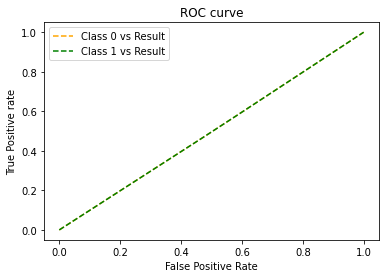

In [51]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_resample_trainRF, y_prob_predRF[:, i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Result')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Result')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   EngineVersion                          1000000 non-null  int64  
 1   AppVersion                             1000000 non-null  int64  
 2   CountryIdentifier                      1000000 non-null  int64  
 3   LocaleEnglishNameIdentifier            1000000 non-null  int64  
 4   Platform                               1000000 non-null  int64  
 5   Processor                              1000000 non-null  int64  
 6   OsVer                                  1000000 non-null  int64  
 7   OsBuild                                1000000 non-null  int64  
 8   OsSuite                                1000000 non-null  int64  
 9   OsPlatformSubRelease                   1000000 non-null  int64  
 10  SkuEdition                             1000